<a href="https://colab.research.google.com/github/anassbelkas/Breast_Ultrasound_Images_Dataset/blob/main/Breast_Ultrasound_Images_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files 
files.upload()

TypeError: ignored

In [ ]:
!mkdir ~/.kaggle 
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download 'aryashah2k/breast-ultrasound-images-dataset'
!mkdir data


 91% 178M/195M [00:01<00:00, 118MB/s] 
100% 195M/195M [00:01<00:00, 119MB/s]


In [ ]:
!unzip breast-ultrasound-images-dataset.zip -d data

Archive:  breast-ultrasound-images-dataset.zip
  inflating: data/Dataset_BUSI_with_GT/benign/benign (1).png  
  inflating: data/Dataset_BUSI_with_GT/benign/benign (1)_mask.png  
  inflating: data/Dataset_BUSI_with_GT/benign/benign (10).png  
  inflating: data/Dataset_BUSI_with_GT/benign/benign (10)_mask.png  
  inflating: data/Dataset_BUSI_with_GT/benign/benign (100).png  
  inflating: data/Dataset_BUSI_with_GT/benign/benign (100)_mask.png  
  inflating: data/Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png  
  inflating: data/Dataset_BUSI_with_GT/benign/benign (101).png  
  inflating: data/Dataset_BUSI_with_GT/benign/benign (101)_mask.png  
  inflating: data/Dataset_BUSI_with_GT/benign/benign (102).png  
  inflating: data/Dataset_BUSI_with_GT/benign/benign (102)_mask.png  
  inflating: data/Dataset_BUSI_with_GT/benign/benign (103).png  
  inflating: data/Dataset_BUSI_with_GT/benign/benign (103)_mask.png  
  inflating: data/Dataset_BUSI_with_GT/benign/benign (104).png  
  inflating:

İmporting basic libraries



In [ ]:
import tensorflow as tf
import pandas as pd 
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt 
import os 
import pathlib 
import random

Defining the path



In [ ]:
path = '/content/data/Dataset_BUSI_with_GT/'
data_dir = pathlib.Path(path)

Getting class names



In [ ]:
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array([], dtype=float64)

Define paths and image count



In [ ]:
benignPath = os.path.join(data_dir,'bening')
malignantPath = os.path.join(data_dir,'malignant')
normalPath = os.path.join(data_dir,'normal')

İmage count



In [ ]:
imageCount = len(list(data_dir.glob('*/*.png')))
imageCount

0

Make Plotting of Random İmages

IndexError: ignored

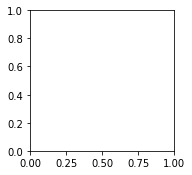

In [ ]:
plt.figure(figsize=(15,15))

for i in range(25):
    plt.subplot(5,5,i+1)
    random_class = random.choice(class_names)
    img = plt.imread(random.choice(list(data_dir.glob(random_class+"/*.png"))))
    plt.xticks([])
    plt.yticks([])
    plt.title(random_class)
    plt.imshow(img)

Check the image formats



In [ ]:
from pathlib import Path
import imghdr

data_dir = '/content/data/Dataset_BUSI_with_GT/'
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

Build the CNN

In [ ]:
batch_size = 96
img_height = 224
img_width = 224

Separating data sets

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset="training",
                  seed=1900,
                  image_size=(img_height, img_width),
                  batch_size=batch_size)


val_data = image_dataset_from_directory(data_dir,
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=1900,
                                        image_size=(img_height,img_width),
                                        batch_size=batch_size)

Found 1578 files belonging to 3 classes.
Using 1263 files for training.
Found 1578 files belonging to 3 classes.
Using 315 files for validation.


Define the Model

In [ ]:
from tensorflow.keras import layers 
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3,activation="softmax")
])

Compile the Model

In [ ]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"])

In [ ]:
epochs = 30
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data, 
                    batch_size=batch_size)

Epoch 1/30
14/14 [==============================] - 7s 291ms/step - loss: 1.1030 - accuracy: 0.4766 - val_loss: 0.8431 - val_accuracy: 0.5937
Epoch 2/30
14/14 [==============================] - 7s 292ms/step - loss: 0.7994 - accuracy: 0.5891 - val_loss: 0.7901 - val_accuracy: 0.6032
Epoch 3/30
14/14 [==============================] - 7s 291ms/step - loss: 0.6470 - accuracy: 0.7118 - val_loss: 0.7170 - val_accuracy: 0.6794
Epoch 4/30
14/14 [==============================] - 7s 293ms/step - loss: 0.5134 - accuracy: 0.7688 - val_loss: 0.7021 - val_accuracy: 0.7365
Epoch 5/30
14/14 [==============================] - 7s 295ms/step - loss: 0.4846 - accuracy: 0.7807 - val_loss: 0.7454 - val_accuracy: 0.7270
Epoch 6/30
14/14 [==============================] - 7s 290ms/step - loss: 0.4019 - accuracy: 0.8274 - val_loss: 0.8764 - val_accuracy: 0.7079
Epoch 7/30
14/14 [==============================] - 7s 290ms/step - loss: 0.3328 - accuracy: 0.8496 - val_loss: 0.7827 - val_accuracy: 0.7302
Epoch 

Keys

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Accuracy vs Lost

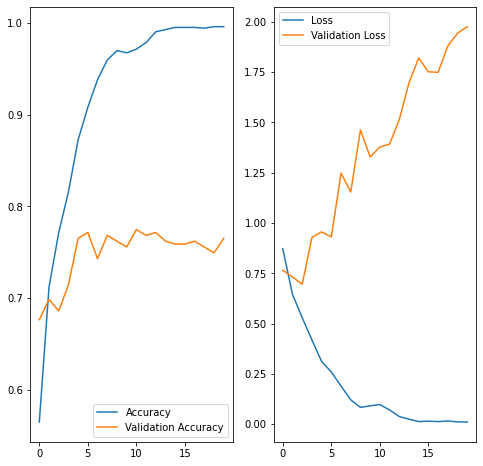

In [ ]:
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

Evaluating - İt return the lost and accuracy



In [ ]:
model.evaluate(val_data)

10/10 [==============================] - 1s 33ms/step - loss: 1.9759 - accuracy: 0.7651


[1.975888967514038, 0.7650793790817261]

Model summary



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

Predictions

1/1 [==============================] - 0s 17ms/step


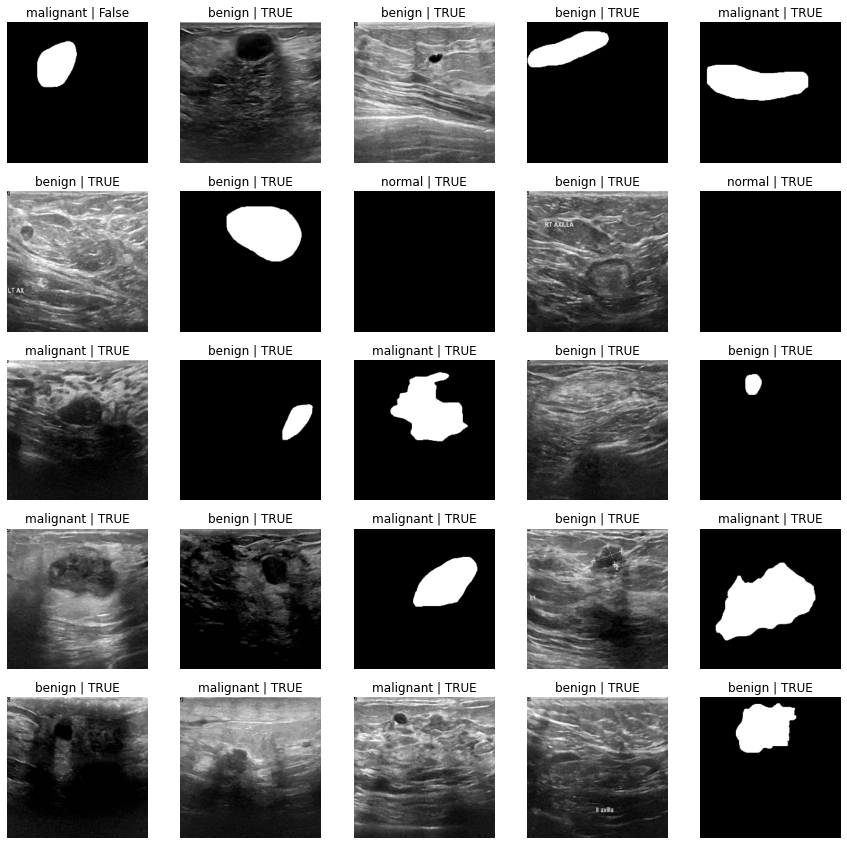

In [ ]:
plt.figure(figsize=(15, 15))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(25):
        
        ax = plt.subplot(5, 5, i + 1)
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result  )
        plt.axis("off")